# Simple Linear Regression Dataset=Salary and Exp 

In [1]:
#lading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
#load the dataset
df=pd.read_csv("Salarydataset.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Conclusion=There are two numeric type column and no categorical once and YearsExperience is independent and Salary is dependent variable.The data is well defined and there is no modification required.

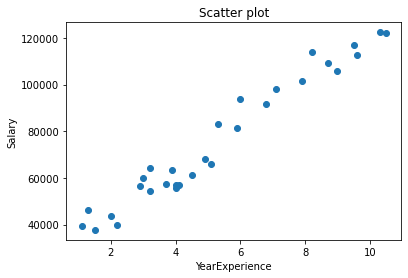

In [3]:
#check of linearity
plt.scatter(x=df["YearsExperience"],y=df["Salary"])
plt.xlabel("YearExperience")
plt.ylabel("Salary")
plt.title("Scatter plot")
plt.show()

Conclusion=The two variables are linerly dependent on each other.There are two variables and hence we use simple linear regression for prediction.

In [4]:
#EDA (Shape)
df.shape

(30, 2)

In [5]:
#EDA (Size)
df.size

60

In [6]:
#EDA (Describe)
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
#EDA(Info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Conclusion=The dtype of col and the data matched hence there is no change of dtype required

In [8]:
#Check of missing values check
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Conclusion=There are no missing values

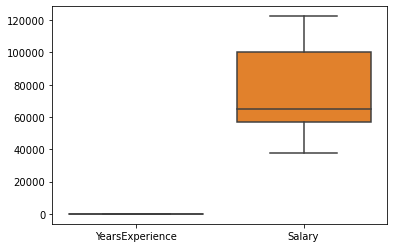

In [9]:
#Check of outliers in salary
sns.boxplot(data=df);

Conclusion=No outliers

In [10]:
#EDA(Corr)
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Conclusion=There is positive good corr between the independent and dependent variable

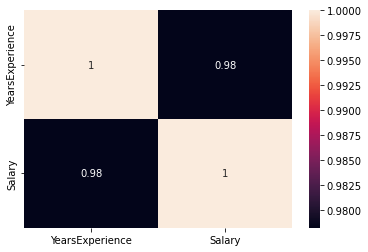

In [11]:
#Data visulization (Heat map of corr)
sns.heatmap(df.corr(),annot=True);

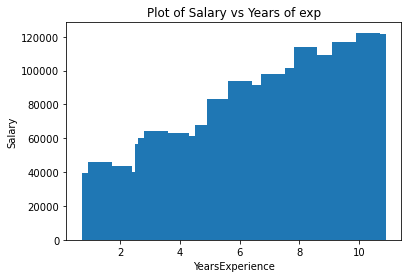

In [12]:
#Data visulization 
plt.bar(data=df,x=df["YearsExperience"],height=df["Salary"]);
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Plot of Salary vs Years of exp");

Conclusion=Salary is greater for greater exp

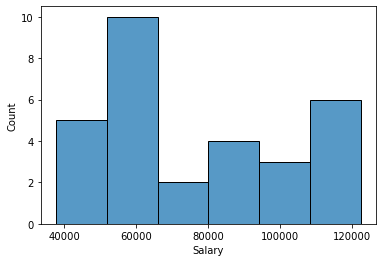

In [13]:
#Data visulization of independent col
sns.histplot(df["Salary"]);

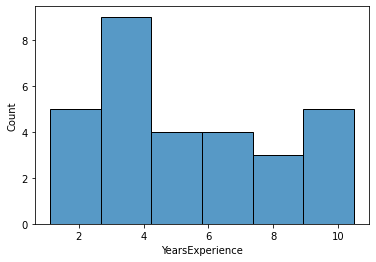

In [14]:
#Data visulization of dependent variable
sns.histplot(df["YearsExperience"]);

In [15]:
#Data Partition
X=df["YearsExperience"]
y=df["Salary"]
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

## Hypothesis testing

There is no linear realtionship=Ho

There is Linear relationship=H1

alpha=0.05

In [16]:
#Model using ols
model=smf.ols("Salary~YearsExperience",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        22:38:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#prediction using model eqn ols
y=((2.678)*(10**4))+(9449.9623*4)
y

64579.8492

<AxesSubplot:xlabel='fitted_values', ylabel='residuals'>

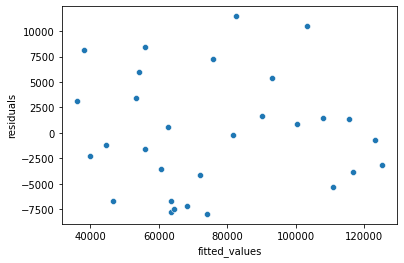

In [18]:
#Homoscedasticity
df["residuals"]=model.resid
df["fitted_values"]=model.fittedvalues
sns.scatterplot(y="residuals",x="fitted_values",data=df)

Conclusion=There is homoscedasticity

# Thank you